Done solo by: Nestor Molina

# Part A: Association Rule Mining

## Task 2


In [ ]:
library(tidyverse)

install.packages("arules")
library(arules)

In [ ]:
install.packages("mlbench")
data(Zoo, package="mlbench")
head(Zoo)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<int>,<lgl>,<lgl>,<lgl>,<fct>
aardvark,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,4,FALSE,FALSE,TRUE,mammal
antelope,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,4,TRUE,FALSE,TRUE,mammal
bass,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,0,TRUE,FALSE,FALSE,fish
bear,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,4,FALSE,FALSE,TRUE,mammal
boar,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,4,TRUE,FALSE,TRUE,mammal
buffalo,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,4,TRUE,FALSE,TRUE,mammal


Converting everything to factors to allow for negative rule minging.
The tutorial converted 'number of legs' to 'has legs' but converting it to a factor gives the same type of result where '0 legs' is the same as 'has legs == False'

In [ ]:
zoo <- Zoo %>% mutate_if(is.logical, factor)
zoo <- zoo %>% mutate_if(is.integer, factor)
sapply(zoo, class)

hair feathers     eggs     milk airborne  aquatic predator  toothed 
"factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor" 
backbone breathes venomous     fins     legs     tail domestic  catsize 
"factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor" 
    type 
"factor"

In [ ]:
(tr <- transactions(zoo))
summary(tr)

transactions in sparse format with
 101 transactions (rows) and
 43 items (columns)

transactions as itemMatrix in sparse format with
 101 rows (elements/itemsets/transactions) and
 43 columns (items) and a density of 0.3953488 

most frequent items:
venomous=FALSE domestic=FALSE     fins=FALSE  backbone=TRUE feathers=FALSE 
            93             88             84             83             81 
       (Other) 
          1288 

element (itemset/transaction) length distribution:
sizes
 17 
101 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     17      17      17      17      17      17 

includes extended item information - examples:
          labels variables levels
1     hair=FALSE      hair  FALSE
2      hair=TRUE      hair   TRUE
3 feathers=FALSE  feathers  FALSE

includes extended transaction information - examples:
  transactionID
1      aardvark
2      antelope
3          bass

Running the rule mining algorithm with default settings returns too many rules (1435785 rules)

In [ ]:
maxRules = 25
minSup = 0.9
decAmount = 0.1

repeat{
  rules <- apriori(tr, parameter=list(supp = minSup, minlen = 2))
  minSup <- minSup - decAmount

  if(length(rules) < maxRules) next

  rules <- subset(rules, subset = confidence >= 0.9)
  rules <- subset(rules, subset = lift >= 1.6)
  rules <- subset(rules, subset = coverage >= 0.4)
  rules <- rules[!is.redundant(rules)]

  if( (length(rules) <= maxRules & length(rules) >= (maxRules-6)) | minSup <= 0.1) break
}

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.9      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 90 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[43 item(s), 101 transaction(s)] done [0.00s].
sorting and recoding items ... [1 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.8      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TR

In [ ]:
inspect(rules)

     lhs                                rhs            support   confidence
[1]  {milk=TRUE}                     => {type=mammal}  0.4059406 1.0000000 
[2]  {type=mammal}                   => {milk=TRUE}    0.4059406 1.0000000 
[3]  {eggs=FALSE}                    => {toothed=TRUE} 0.4059406 0.9761905 
[4]  {hair=FALSE}                    => {milk=FALSE}   0.5544554 0.9655172 
[5]  {milk=FALSE}                    => {hair=FALSE}   0.5544554 0.9333333 
[6]  {eggs=TRUE}                     => {milk=FALSE}   0.5742574 0.9830508 
[7]  {milk=FALSE}                    => {eggs=TRUE}    0.5742574 0.9666667 
[8]  {eggs=FALSE, backbone=TRUE}     => {toothed=TRUE} 0.4059406 1.0000000 
[9]  {hair=FALSE, catsize=FALSE}     => {eggs=TRUE}    0.4158416 0.9545455 
[10] {hair=FALSE, catsize=FALSE}     => {milk=FALSE}   0.4356436 1.0000000 
[11] {eggs=TRUE, catsize=FALSE}      => {milk=FALSE}   0.4554455 1.0000000 
[12] {hair=FALSE, eggs=TRUE}         => {milk=FALSE}   0.5346535 1.0000000 
[13] {eggs=T

## Task 3

In [ ]:
install.packages("arulesViz")
library(arulesViz)

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



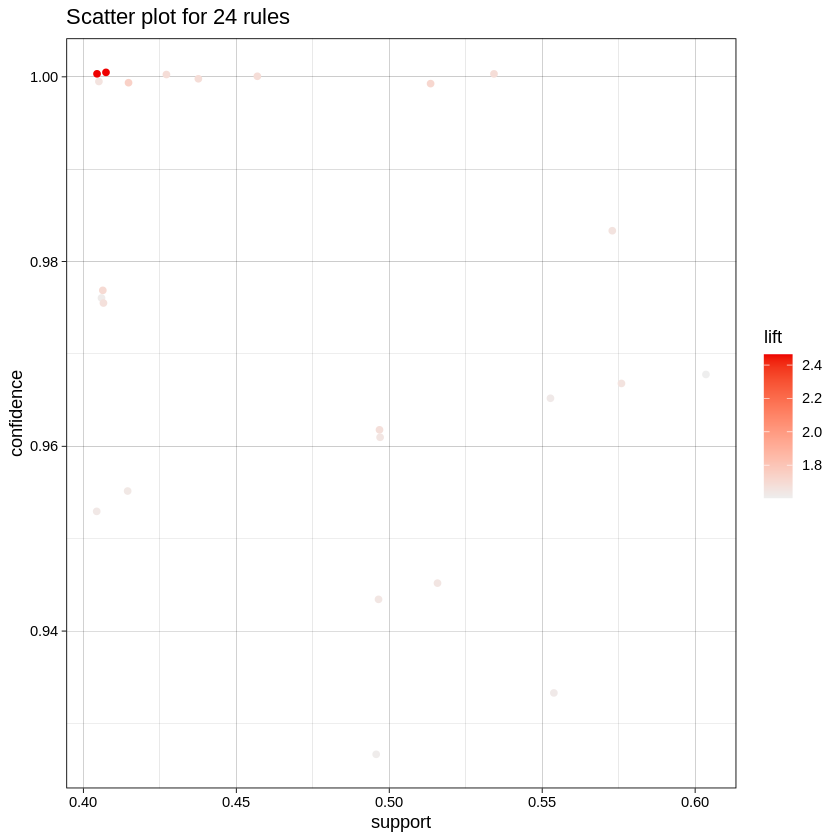

In [ ]:
plot(rules)

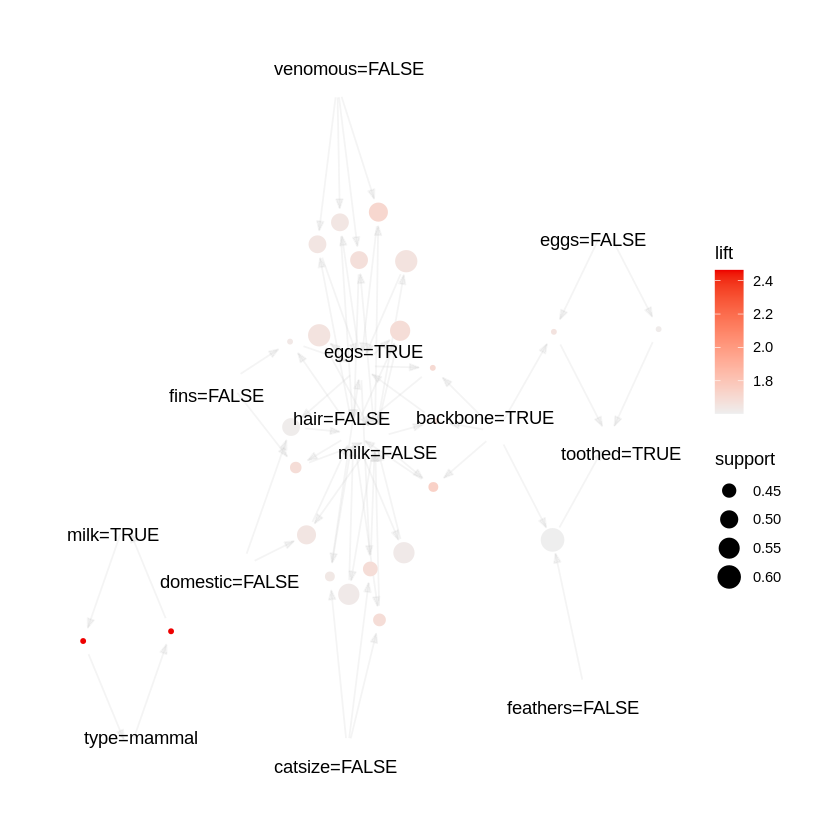

In [ ]:
plot(rules, method='graph')

Itemsets in Antecedent (LHS)
 [1] "{milk=TRUE}"                    "{type=mammal}"                 
 [3] "{milk=FALSE,backbone=TRUE}"     "{eggs=TRUE,backbone=TRUE}"     
 [5] "{milk=FALSE,venomous=FALSE}"    "{eggs=TRUE,catsize=FALSE}"     
 [7] "{hair=FALSE,eggs=TRUE}"         "{hair=FALSE,catsize=FALSE}"    
 [9] "{hair=FALSE,fins=FALSE}"        "{eggs=FALSE,backbone=TRUE}"    
[11] "{eggs=TRUE}"                    "{milk=FALSE,domestic=FALSE}"   
[13] "{hair=FALSE,venomous=FALSE}"    "{eggs=TRUE,venomous=FALSE}"    
[15] "{milk=FALSE}"                   "{hair=FALSE}"                  
[17] "{eggs=FALSE}"                   "{eggs=TRUE,domestic=FALSE}"    
[19] "{feathers=FALSE,backbone=TRUE}"
Itemsets in Consequent (RHS)
[1] "{toothed=TRUE}" "{eggs=TRUE}"    "{hair=FALSE}"   "{milk=FALSE}"  
[5] "{milk=TRUE}"    "{type=mammal}" 


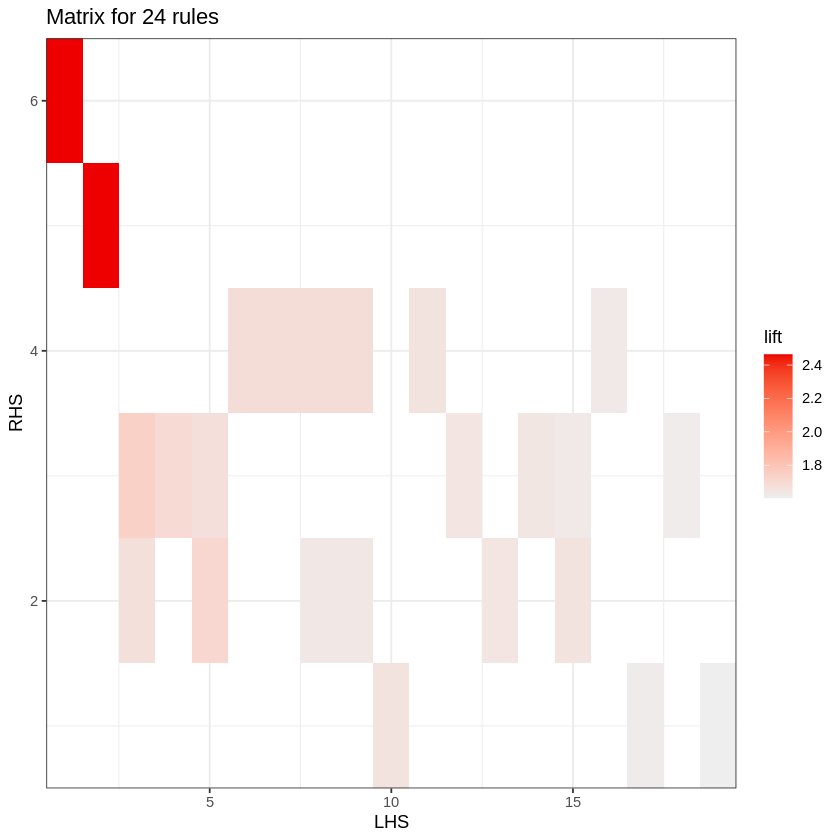

In [ ]:
plot(rules, method='matrix')

# Part B: Clustering

In this part you will use two clustering algorithms, Kmeans and DBscan on the Wholesale customers dataset [UCI Machine Learning Repository: Wholesale customers Data Set](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). Apply the two algorithms, visualize the results, and evaluate the results using the silhouette cluster quality measure.

## Task 4

In [ ]:
if (!require(data.table)) install.packages('data.table')
library(data.table)

if (!require(dbscan)) install.packages('dbscan')
library(dbscan)

if (!require(factoextra)) install.packages("factoextra")
library(factoextra)

if (!require(cluster)) install.packages('cluster')
library(cluster)

In [ ]:
data <- setDF(fread('https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'))

head(data)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2,3,12669,9656,7561,214,2674,1338
2,2,3,7057,9810,9568,1762,3293,1776
3,2,3,6353,8808,7684,2405,3516,7844
4,1,3,13265,1196,4221,6404,507,1788
5,2,3,22615,5410,7198,3915,1777,5185
6,2,3,9413,8259,5126,666,1795,1451


In [ ]:
for (i in 1:ncol(data)) {
  data[[i]] <- (data[[i]] - min(data[[i]])) / (max(data[[i]]) - min(data[[i]]))
}

head(data)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,0.11294004,0.13072723,0.08146416,0.003106305,0.06542720,0.02784731
2,1,1,0.06289903,0.13282409,0.10309667,0.028548419,0.08058985,0.03698373
3,1,1,0.05662161,0.11918086,0.08278992,0.039116429,0.08605232,0.16355861
4,0,1,0.11825445,0.01553586,0.04546385,0.104841891,0.01234568,0.03723404
5,1,1,0.20162642,0.07291369,0.07755155,0.063933995,0.04345483,0.10809345
6,1,1,0.08390698,0.11170568,0.05521843,0.010535139,0.04389575,0.03020442


## DBSCAN

In [ ]:
if (!require(akmedoids)) install.packages('akmedoids')
library(akmedoids)

In [ ]:
# Find suitable eps & minPts

max.sil = 0
best.minPts = 0
best.eps = 0
d = (ncol(data) + 1)

for (i in 3:(2*d)) {
  # Find the elbow 
  y <- sort(kNNdist(data, k=i))
  x <- 1:length(y)
  eps <- elbow_point(x, y)$y

  # Use elbow point as eps
  dbcl <- dbscan(data, eps, minPts=i+1, weights=NULL, borderPoints=TRUE)

  # Calculate silhouette
  dbcl.sil <- silhouette(dbcl$cluster, dist(data))
  m <- mean(dbcl.sil[,3])

  # Update 
  if (m > max.sil) {
    max.sil <- m
    best.minPts <- i+1
    best.eps <- eps
  }
}

print(best.minPts)
print(best.eps)
print(max.sil)

[1] 12
[1] 0.4290325
[1] 0.638639


In [ ]:
minPts = best.minPts # 12
eps = best.eps #0.4290325

(dbcl <- dbscan(data, eps, minPts=minPts, weights=NULL, borderPoints=TRUE))

DBSCAN clustering for 440 objects.
Parameters: eps = 0.429032493525649, minPts = 12
The clustering contains 6 cluster(s) and 8 noise points.

  0   1   2   3   4   5   6 
  8 101 209  59  18  18  27 

Available fields: cluster, eps, minPts

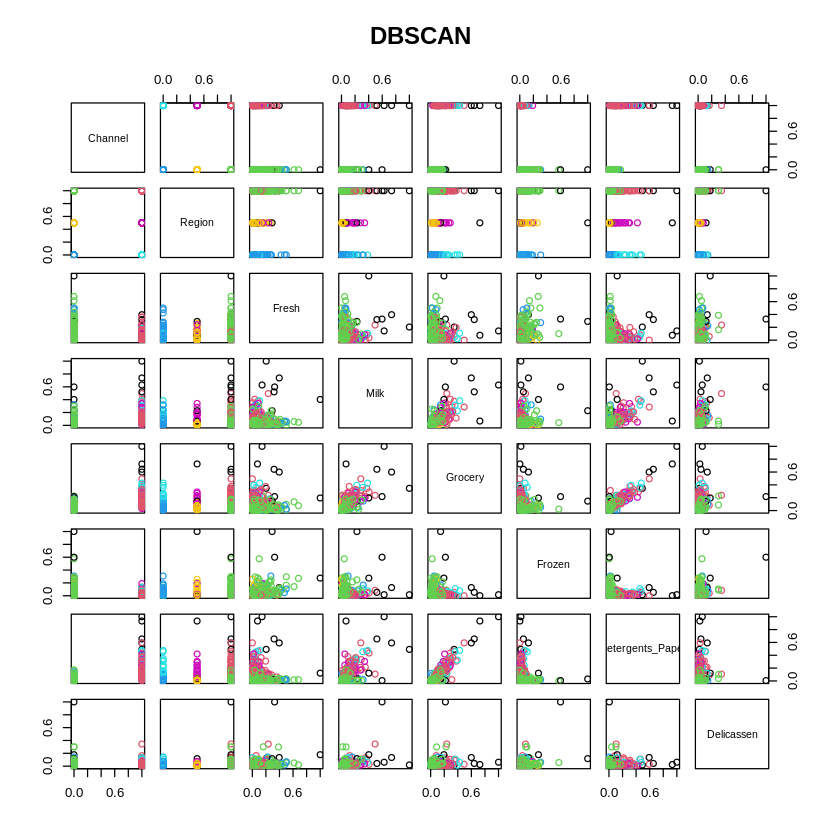

In [ ]:
plot(data, col=dbcl$cluster+1, main='DBSCAN')

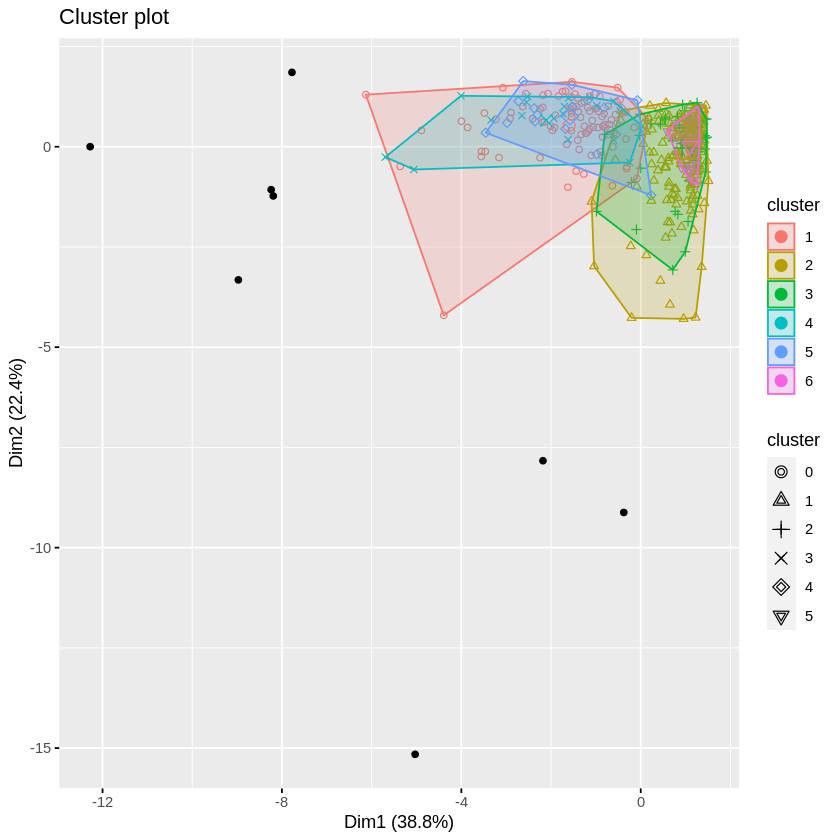

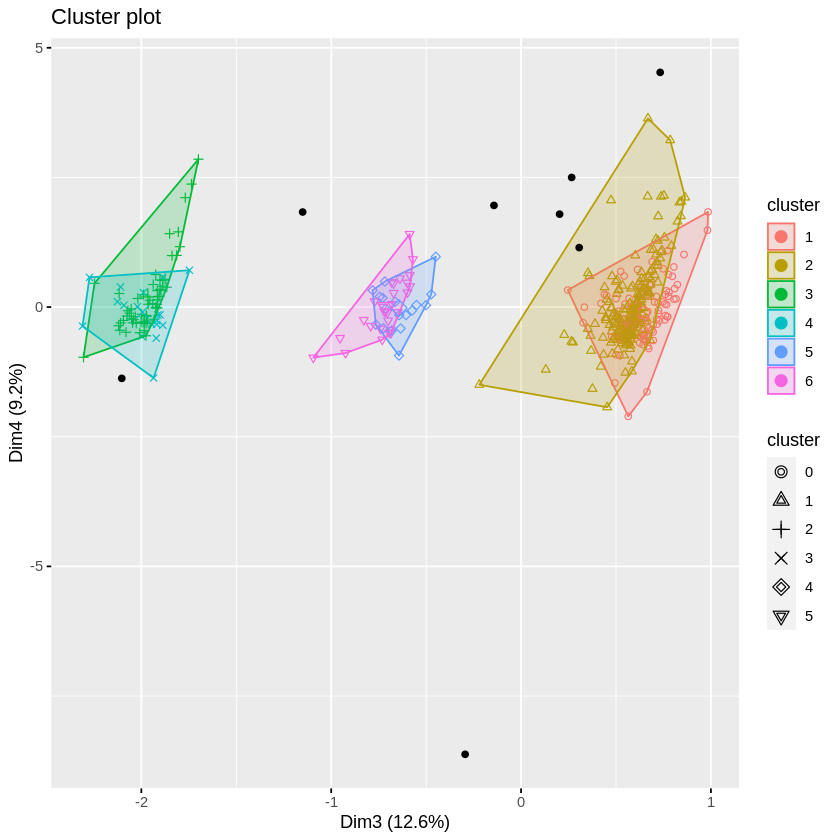

In [ ]:
fviz_cluster(dbcl, data=data, labelsize=0)
fviz_cluster(dbcl, data=data, labelsize=0, axes=c(3,4))

## KMeans

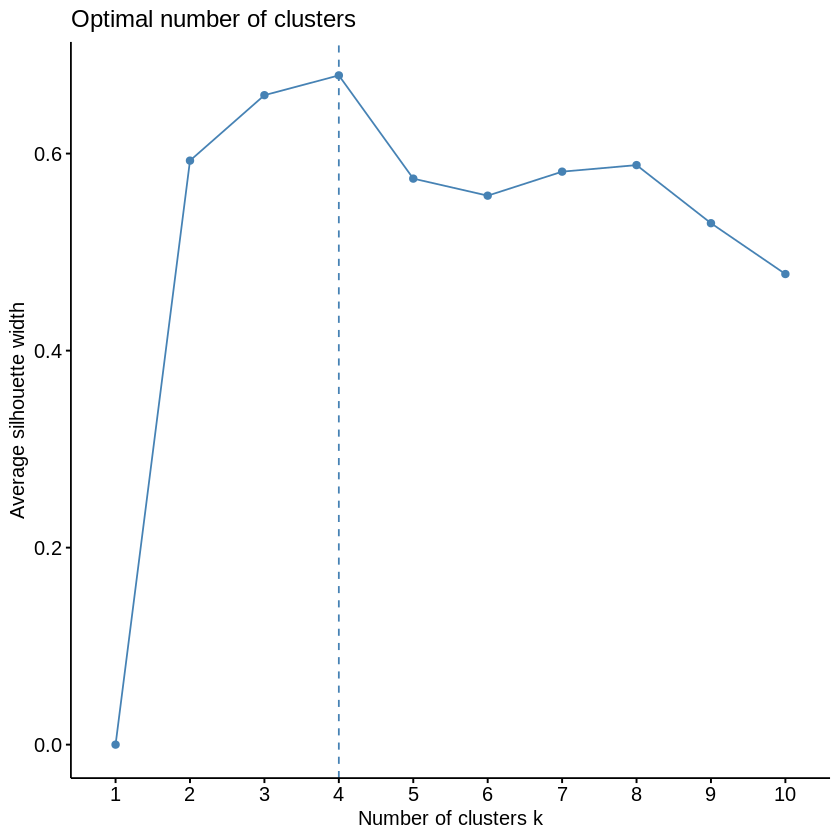

In [ ]:
fviz_nbclust(data, kmeans, method='silhouette')

In [ ]:
k = 4
(kmc <- kmeans(data, k, iter.max=15, nstart=25, 
  algorithm=c('Hartigan-Wong', 'Lloyd', 'Forgy', 'MacQueen'), 
  trace=FALSE))

K-means clustering with 4 clusters of sizes 211, 37, 87, 105

Cluster means:
  Channel    Region      Fresh       Milk    Grocery     Frozen
1       0 1.0000000 0.12372091 0.04672986 0.04186096 0.05969201
2       1 0.2567568 0.05590947 0.13494635 0.18719225 0.03325296
3       0 0.1609195 0.11142778 0.04508555 0.04464481 0.06483473
4       1 1.0000000 0.08763870 0.14876856 0.17192633 0.02445927
  Detergents_Paper Delicassen
1       0.01919661 0.03160793
2       0.20373482 0.03220523
3       0.01952199 0.02429665
4       0.16892608 0.03803107

Clustering vector:
  [1] 4 4 4 1 4 4 4 4 1 4 4 4 4 4 4 1 4 1 4 1 4 1 1 4 4 4 1 1 4 1 1 1 1 1 1 4 1
 [38] 4 4 1 1 1 4 4 4 4 4 4 4 4 1 1 4 4 1 1 4 4 1 1 4 4 4 4 1 4 1 4 1 1 1 1 1 4
 [75] 4 1 1 4 1 1 1 4 4 1 4 4 4 1 1 1 1 1 4 1 4 1 4 1 1 1 4 4 4 1 1 1 4 4 4 4 1
[112] 4 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1
[149] 1 1 1 1 1 1 1 4 4 1 4 4 4 1 1 4 4 4 4 1 1 1 4 4 1 4 1 4 1 1 1 1 1 1 1 1 1
[186] 1 1 1 4 4 1 1 1 4 1 1 3 2 3

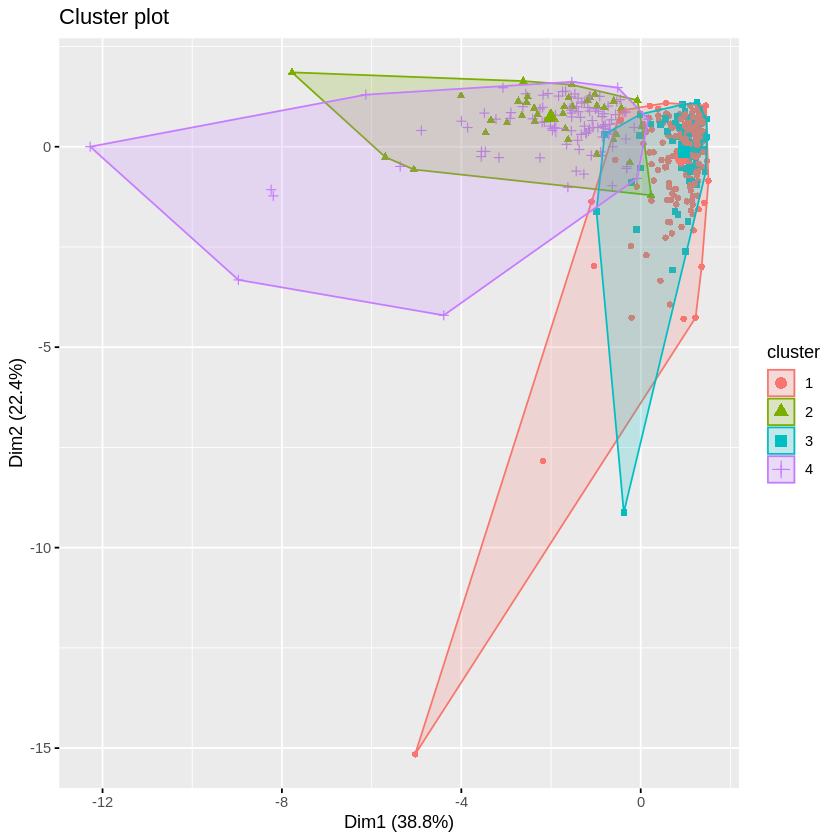

In [ ]:
# Visualize

fviz_cluster(kmc, data=data, geom='point')

In [ ]:
kmc.sil <- silhouette(kmc$cluster, dist(data))
cat("KMeans Silhouette:", {mean(kmc.sil[,3])})

KMeans Silhouette: 0.6799627

In [ ]:
dbcl.sil <- silhouette(dbcl$cluster, dist(data))
cat("DBSCAN Silhouette:", mean(dbcl.sil[,3]))

DBSCAN Silhouette: 0.638639